# Application of One-Shot Learing & Siamese Network


In this notebook, we will build a **face verificaion** & **face recognition** system with **Siamese Network** with **Triplet loss** as the loss function. We will:
- Implement the triplet loss function
- Train Siamese network to map face images into 128-dimensional encodings
- Use these encodings to perform face verification and face recognition

Face recognition problems commonly fall into two categories: 

- **Face Verification** - "is this the claimed person?". For example, at some airports, we can pass through customs by letting a system scan our passport and then verifying that we (the person carrying the passport) are the correct person. A mobile phone that unlocks using our face is also using face verification. This is a 1:1 matching problem. 

- **Face Recognition** - "who is this person?". For example, the video lecture showed a [face recognition video](https://www.youtube.com/watch?v=wr4rx0Spihs) of Baidu employees entering the office without needing to otherwise identify themselves. This is a 1:K matching problem. 

## Classification vs One Shot Learning

In case of **standard classification**, the input image is fed into a series of layers, and finally at the output we generate a probability distribution over all the classes (typically using a Softmax). For example, if we are trying to classify an image as cat or dog or horse or elephant, then for every input image, we generate 4 probabilities, indicating the probability of the image belonging to each of the **4** classes. 

Two important points must be noticed here: 
1. During the training process, we require a large number of images for each of the class (cats, dogs, horses and elephants). 
2. Tf the network is trained only on the above **4** classes of images, then we cannot expect to test it on any other class, example “zebra”. If we want our model to classify the images of zebra as well, then we need to first get a lot of zebra images and then we must re-train the model again. 

There are applications wherein we neither have enough data for each class and the total number classes is huge as well as dynamically changing. Thus, the cost of data collection and periodical re-training is too high. On the other hand, in a **one shot classification**, we require only one training example for each class. Hence the name **One Shot**. Let’s try to understand with a real world practical example. Assume that we want to build **face recognition system** for a small organization with only **10** employees (small numbers keep things simple). Using a traditional classification approach, we might come up with a system that looks as below:

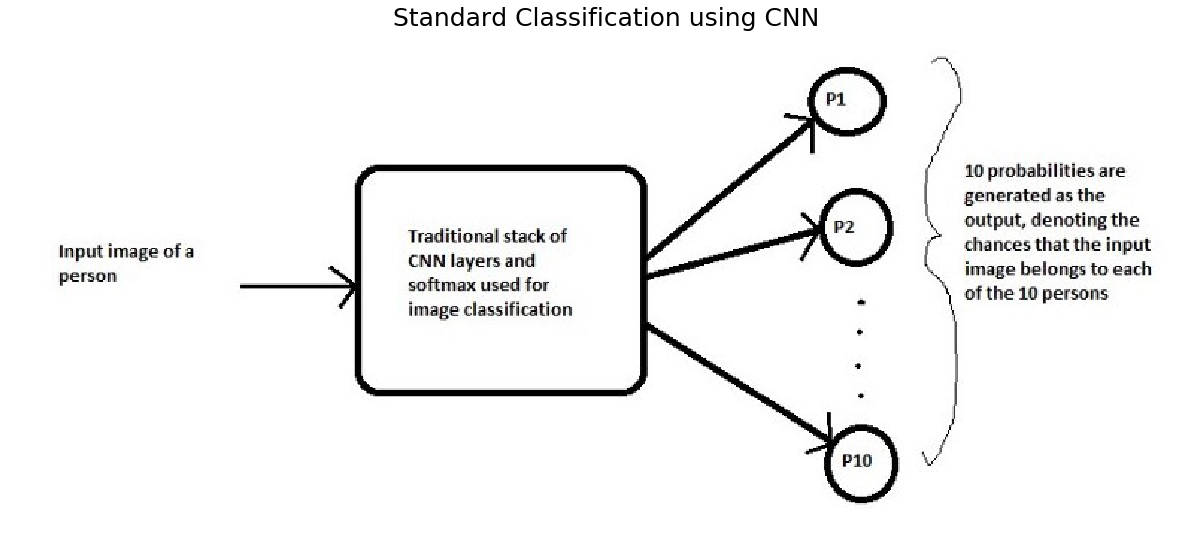

In [11]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(25, 9))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/2.jpeg'), cv2.COLOR_BGR2RGB))
plt.title('Standard Classification using CNN', fontsize=25)
plt.show()

## Problems:
1. To train such a system, we first require a lot of different images of each of the **10** persons in the organization which might not be feasible. (Imagine if we are doing this for an organization with thousands of employees).
2. What if a new person joins or leaves the organization? We need to take the pain of collecting data again and re-train the entire model again. This is practically not possible specially for large organizations where recruitment and attrition is happening almost every week.

Now let’s understand how do we approach this problem using one shot classification which helps to solve both of the above issues:

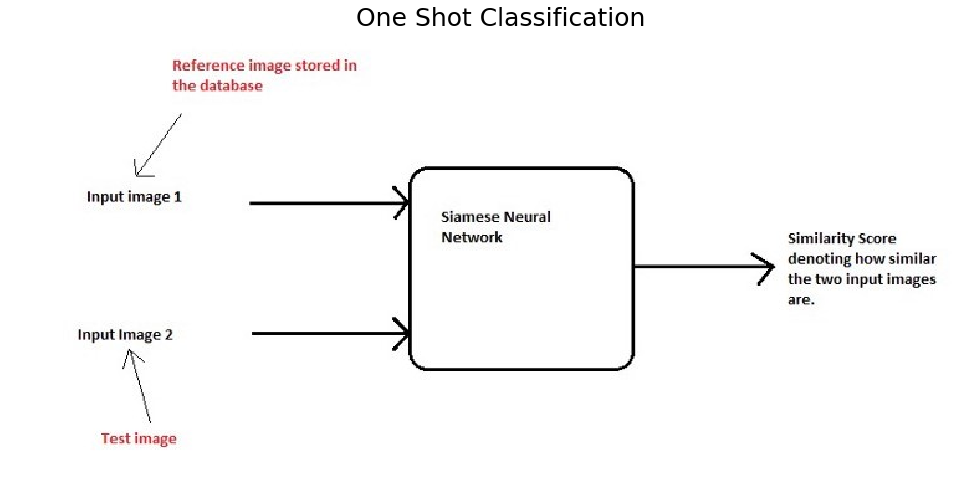

In [12]:
plt.figure(figsize=(40, 8))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/3.jpeg'), cv2.COLOR_BGR2RGB))
plt.title('One Shot Classification', fontsize=25)
plt.show()

Instead of directly classifying an input(test) image to one of the **10** people in the organization, this network instead takes an extra reference image of the person as input and will produce a similarity score denoting the chances that the two input images belong to the same person. Typically the **similarity score is** squished between **0** and **1** using a **sigmoid** function; wherein **0** denotes **no similarity** and **1** denotes **full similarity**. Any number between **0** and **1** is interpreted accordingly.

Notice that this network is not learning to classify an image directly to any of the output classes. Rather, it is learning a similarity function, which takes two images as input and expresses how similar they are.


How does this solve the two problems we discussed above?
1. In a short while we will see that to train this network, we do not require too many instances of a class and only few are enough to build a good model.
2. But the biggest advantage is that , let’s say in case of face recognition, we have a new employee who has joined the organization. Now in order for the network to detect his face, we only require a single image of his face which will be stored in the database. Using this as the reference image, the network will calculate the similarity for any new instance presented to it. Thus we say that network predicts the score in one shot.

## Face Recognition

A **Facial Recognition** System is a technology that can capture a human face anywhere in an image or a video and also can find out its identity. A Face Recognition system has proven to be very beneficial in case of user identity verification in the recent past replacing the age-old authentication mechanisms like **password protection** or the **One Time Passwords**. In the last decade or so, we have seen a huge growth in the smart mobile industry for using face verification, and also numerous apps like **Snapchat** or **Instagram** which can put interesting filters on face. The ongoing research in this field has come up with a lot of scope in a wide range of applications, such as **surveillance systems** or **law enforcement**.

## One Shot Learning

Deep neural networks are really good at learning from high dimensional data like images or spoken language, but only when they have huge amounts of labelled examples to train on. Humans on the other hand, are capable of **one-shot learning** - if we take a human who’s never seen a spatula before, and show them a single picture of a spatula, they will probably be able to distinguish spatulas from other kitchen utensils with astoundingly high precision.

Recently there have been many interesting papers about **one-shot** learning with neural nets and they’ve gotten some good results and one of them is using **Siamese Network**.

## Siamese Network

The term originally comes from the conjoined **twin brothers** Chang and Eng Bunker, who were the first pair to be known internationally. The term is used for those twins who are physically connected to each other at the chest, or at the abdomen or the pelvis. The two individuals were originally from Thailand, formerly known as **Siam**, hence the name. In CNN literature, **Siamese Network** is a **Neural Network** which also consists of a pair of Networks which are actually the same, hence the name derives from the **Siamese Twins**. The two Convolutional Neural Networks shown below are not different networks but are two **copies** of the same network, hence the name **Siamese Networks**. Basically they share the same parameters. The two input images **(x1 and x2)** are passed through the ConvNet to generate a fixed length feature vector for each **(h(x1) and h(x2))**. 

Assuming the neural network model is trained properly, we can make the following hypothesis: 

*If the two input images belong to the same character, then their feature vectors must also be similar, while if the two input images belong to the different characters, then their feature vectors will also be different. Thus the element-wise absolute difference between the two feature vectors must be very different in both the above cases. And hence the similarity score generated by the output sigmoid layer must also be different in these two cases.*

This is the central idea behind the **Siamese Networks**.

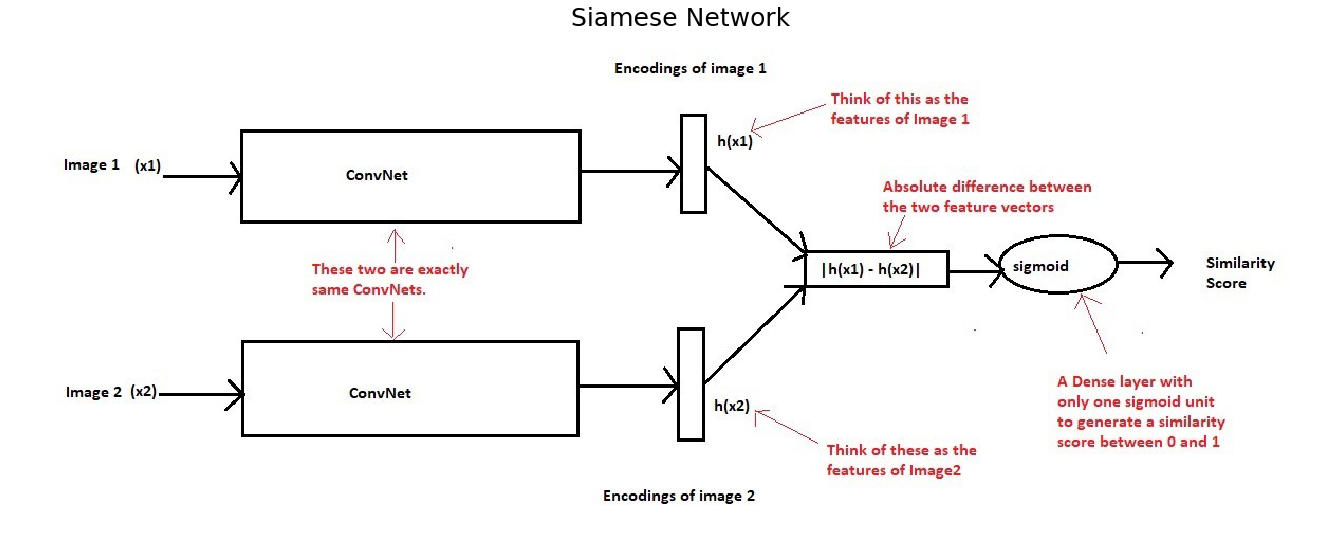

In [13]:
plt.figure(figsize=(40, 9))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/4.jfif'), cv2.COLOR_BGR2RGB))
plt.title('Siamese Network', fontsize=25)
plt.show()

## Understanding of Siamese Networks

As we saw above, the **Siamese twins** are connected physically, the Siamese network also consists of a pair of Neural Networks which are identical to each other, also known as **Sister Networks**. Unlike a conventional CNN, the **Siamese Network** does not classify the images into certain categories or labels, rather it only finds out the distance between any two given images. If the images have the same label, then the network should learn the parameters, i.e. the weights and the biases in such a way that it should produce a smaller distance between the two images, and if they belong to different labels, then the distance should be larger.

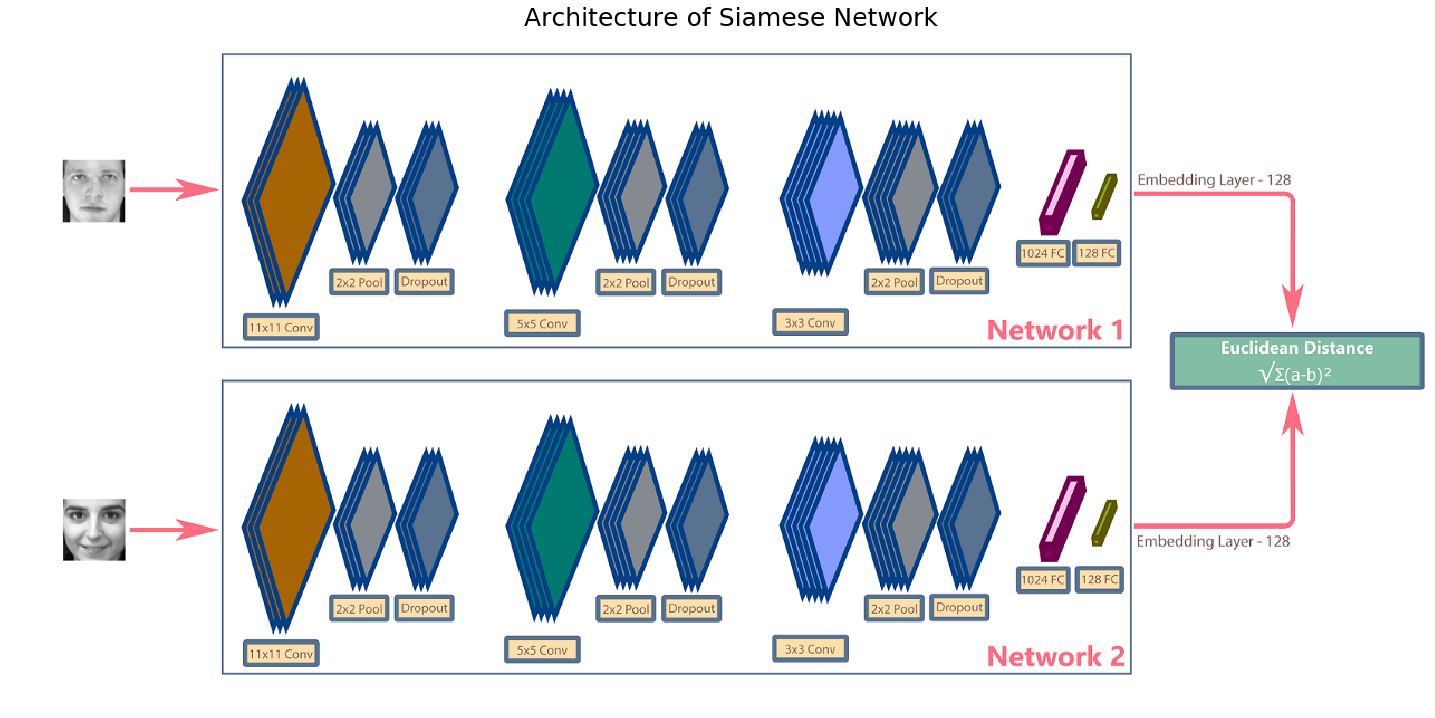

In [49]:
plt.figure(figsize=(25, 15))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/1.png'), cv2.COLOR_BGR2RGB))
plt.title('Architecture of Siamese Network', fontsize=25)
plt.show()

##### As it shows in the above diagram, the pair of the networks are the same. Working of the Siamese Network is as follows.

- To train a **Siamese Network**, a pair of images are picked from the dataset, each one processed by one of the networks above.
- The networks have the same structure, hence the same operations will be performed on the respective images.
- The Neural Networks at the end have Fully Connected Layers, with the last one consisting of 128 nodes. This layer is the final feature that gets produced when the network is applied on the image. It’s called the **Embedding Layer** Representation. So the two images in the pair processed by the **Siamese Network** produce two different **Embedding Layer Representations**.
- The Network then finds the **Euclidean distance** between both the embedding layers. If the images are of the same person, then it is expected that the embeddings will be very similar, hence distance should be smaller. However, if the images are of different people, then the distance is expected to be a higher value.
- A **Sigmoid Function** is applied on the distance value to bring it to 0–1 range.
- A loss function is put on the sigmoid result, to penalize the network to update its weights and the biases. We will be using **Triplet Loss** for the loss function. Updation of the weights and the biases done on both the networks are exactly the same.
- This process repeats for all the image pairs generated from the dataset.
- The network takes images of specific shape.
- The network ends with the **128** node **Fully Connected Embedding Layer Representation**.
- The fact that the network uses the same structure twice with two different images, it actually can be achieved with a single instance of the network. With this the parameter updating also becomes easier, as the weights and the biases will be updated in the same instance only.
- Two images are provided to the network, and the network produces the embedding layers or the features, hence the network also acts as a **Feature Extractor**.
- The **Euclidean distance** is calculated by finding out the **square root** of the sum of the squares of the difference of both the embeddings. The distance value is adjusted to a range of **0–1** using **Sigmoid**.

## Pros and Cons of Siamese Networks:

1. The main **advantages** of **Siamese Networks** are:
- More Robust to **class Imbalance**: With the aid of **One-shot learning**, given a few images per class is sufficient for **Siamese Networks** to recognize those images in the future
- Nice to an **ensemble** with the best classifier: Given that its learning mechanism is somewhat different from Classification, simple averaging of it with a Classifier can do much better than average 2 correlated Supervised models (e.g. GBM & RF classifier)
- Learning from **Semantic Similarity**: Siamese focuses on learning embeddings (in the deeper layer) that place the same classes/concepts close together. Hence, can learn semantic similarity.

2. The **downsides** of the **Siamese Networks** can be:
- Needs **more training time** than normal networks: Since **Siamese Networks** involves quadratic pairs to learn from (to see all information available) it is slower than normal classification type of learning(**pointwise learning**)
- Doesn’t output probabilities: Since training involves pairwise learning, it won’t output the probabilities of the prediction, but the distance from each class


## Where and When to use a Siamese Model?

**Siamese Network** is mostly used when we don’t have a huge number of images for the training. A Deep Learning Neural Network for Classification performs better only when the number of images in the dataset is huge. For example, If we are building a **Face Recognition** System for an Office with only **100** employees. Their face repository has only a maximum of **10** face images for each of them. Here the number of images are really less, to create a **Classification Neural Network**. **Siamese Network** comes in as a handy replacement here. It does not learn the classes, rather it learns the **similarity function**. The number of images need not be high for a **Siamese Network**. Let’s say tomorrow a new employee joins in, and we’ve got only a single image for him. With the **Siamese Model** in place, we don’t even need to retrain the model. We can add the single image that we got for the new employee into our face repository and the model would work the same. It would be able to find out the distance of the new employee with the others. Whereas, with a classification model, it needs to re-learn the features for the new employee, to be able to classify him.

## Let's move onto the coding part

### Load packages

In [54]:
import os
import cv2
import numpy as np
import pandas as pd
from fr_utils import *
import tensorflow as tf
from numpy import genfromtxt
from keras import backend as K
from keras.models import Model
from inception_blocks_v2 import *
from keras.models import Sequential
from keras.engine.topology import Layer
K.set_image_data_format('channels_first')
from keras.layers.merge import Concatenate
from keras.initializers import glorot_uniform
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout, GlobalAveragePooling2D

%matplotlib inline
# %load_ext autoreload
# %autoreload 2
# np.set_printoptions(threshold=np.nan)

# 1. Doing Naive Face Verification(Without using Siamese Network)

In **Face Verification**, we're given two images and we have to determine if they are of the same person. The simplest way to do this is to compare the two images **pixel-by-pixel**. If the distance between the raw images are less than a chosen threshold, it may be the same person! 

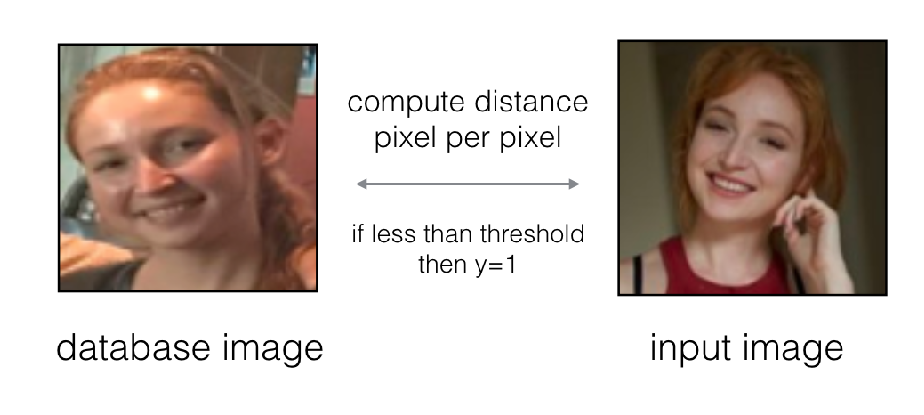

In [31]:
plt.figure(figsize=(20, 7))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/5.png'), cv2.COLOR_BGR2RGB))
plt.show()

* Of course, this algorithm performs really poorly, since the pixel values change dramatically due to variations in lighting, orientation of the person's face, even minor changes in head position, and so on. 
* We'll see that rather than using the raw image, we can learn an encoding, $f(img)$.  
* By using an encoding for each image, an element-wise comparison produces a more accurate judgement as to whether two pictures are of the same person.

# 2. Encoding face images into a 128-dimensional vector

# **2.1 - Using pretrained ConvNet to compute encodings**

The **FaceNet** model takes a lot of data and a long time to train. So following common practice in applied deep learning, let's load weights that someone else has already trained. The network architecture follows the **Inception model** from [Szegedy *et al.*](https://arxiv.org/abs/1409.4842).

The key things we need to know are:

- This network uses 96x96 dimensional RGB images as its input. Specifically, inputs a face image (or batch of $m$ face images) as a tensor of shape $(m, n_C, n_H, n_W) = (m, 3, 96, 96)$ 
- It outputs a matrix of shape $(m, 128)$ that encodes each input face image into a 128-dimensional vector

## Creating an Object of the pretrained model

In [66]:
FR_model = faceRecoModel(input_shape=(3, 96, 96))

## Let have a look at the model summary

In [29]:
FRmodel.summary()

By using a **128-neuron** fully connected layer as its last layer, the model ensures that the output is an encoding vector of size **128**. We then use the encodings to compare two face images as follows:

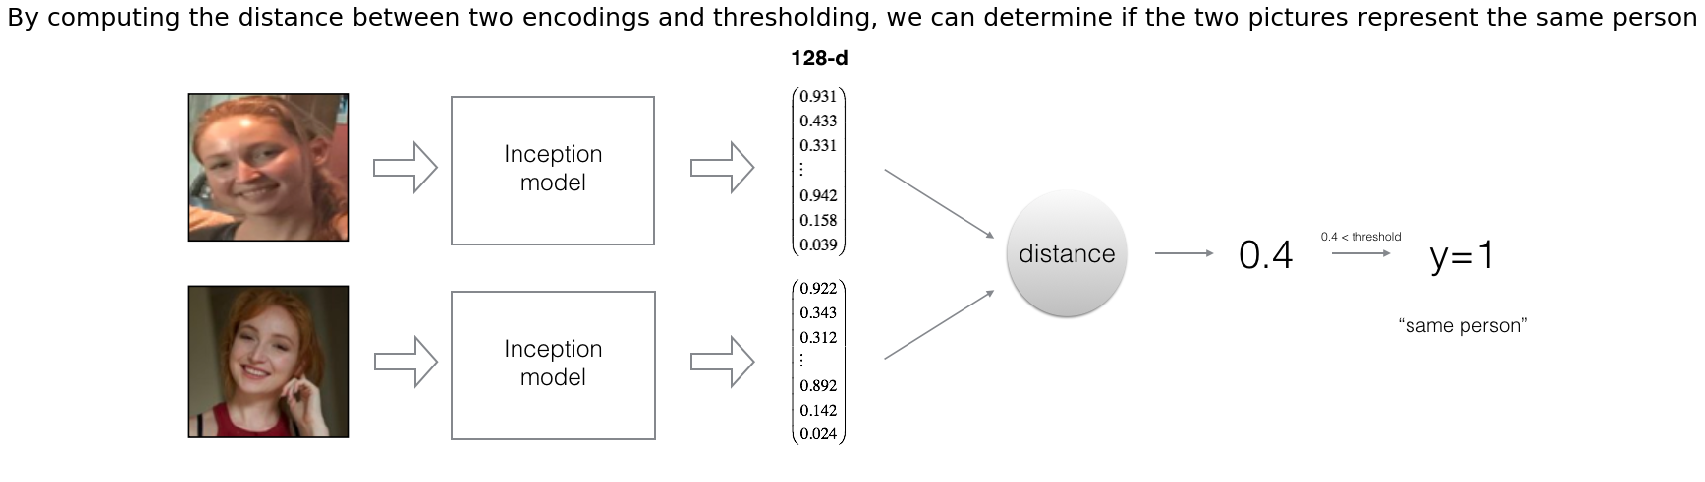

In [28]:
plt.figure(figsize=(25, 9))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/6.png'), cv2.COLOR_BGR2RGB))
plt.title('By computing the distance between two encodings and thresholding, we can determine if the two pictures represent the same person', fontsize=25)
plt.show()

So, an encoding is a good one if: 
- The encodings of two images of the same person are quite similar to each other. 
- The encodings of two images of different persons are very different.

The **triplet loss** function formalizes this, and tries to **"push"** the encodings of two images of the same person (**Anchor and Positive**) closer together, while **"pulling"** the encodings of two images of different persons **(Anchor, Negative)** further apart. 

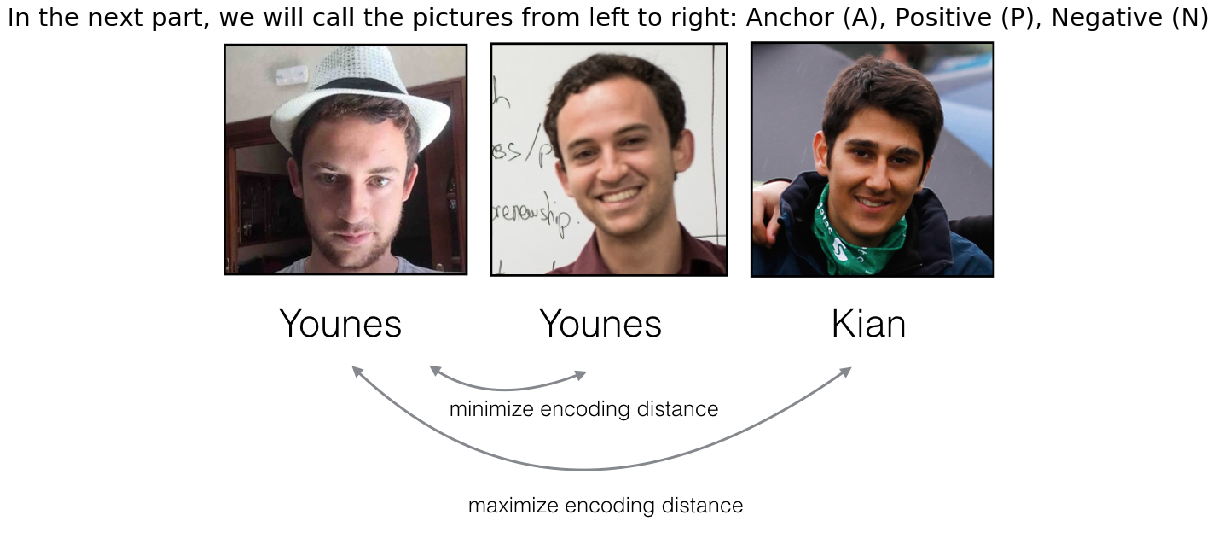

In [27]:
plt.figure(figsize=(25, 9))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/7.png'), cv2.COLOR_BGR2RGB))
plt.title('In the next part, we will call the pictures from left to right: Anchor (A), Positive (P), Negative (N)', fontsize=25)
plt.show()

# **2.2 - Encoding Image into 128D Embedding using *Triplet Loss***

For an image $x$, we denote its encoding $f(x)$, where $f$ is the function computed by the neural network.

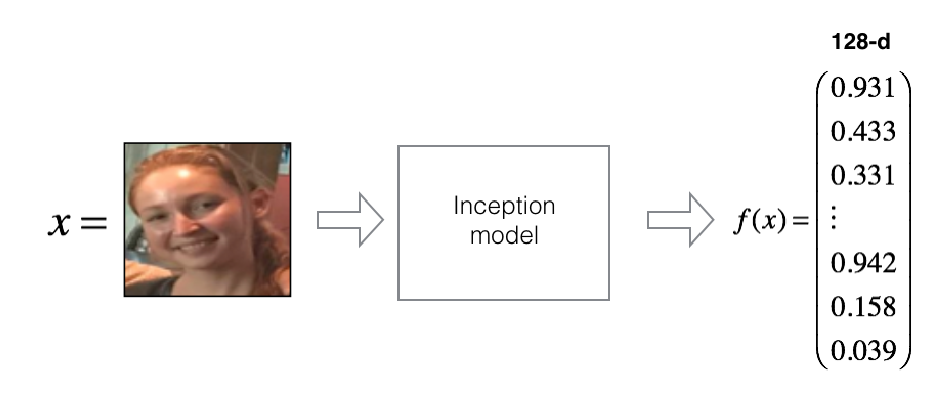

In [33]:
plt.figure(figsize=(20, 7))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/8.png'), cv2.COLOR_BGR2RGB))
plt.show()

# Triplet Loss

Training will use triplets of images $(A, P, N)$:  

- **A** is an **"Anchor"** image--a picture of a person. 
- **P** is a **"Positive"** image--a picture of the same person as the Anchor image.
- **N** is a **"Negative"** image--a picture of a different person than the Anchor image.

These triplets are picked from our training dataset. We will write $(A^{(i)}, P^{(i)}, N^{(i)})$ to denote the $i$-th training example. 

We'd like to make sure that an image $A^{(i)}$ of an individual is closer to the Positive $P^{(i)}$ than to the Negative image $N^{(i)}$) by at least a margin $\alpha$:

$$\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 + \alpha < \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2$$

We would thus like to minimize the following "triplet cost":

$$\mathcal{J} = \sum^{m}_{i=1} \large[ \small \underbrace{\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2}_\text{(1)} - \underbrace{\mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2}_\text{(2)} + \alpha \large ] \small_+ \tag{3}$$

Here, we are using the notation "$[z]_+$" to denote $max(z,0)$.  

Notes:
- The term (1) is the squared distance between the anchor ****"A"** and the **positive "P"** for a given triplet; we want this to be small. 
- The term (2) is the squared distance between the anchor **"A"** and the **negative "N"** for a given triplet, we want this to be relatively large. It has a minus sign preceding it because minimizing the negative of the term is the same as maximizing that term.

- $\alpha$ is called the margin. It is a hyperparameter that we pick manually. We will use $\alpha = 0.2$. 

Most implementations also rescale the encoding vectors to haven **L2** norm equal to one (i.e., $\mid \mid f(img)\mid \mid_2$=1); 

Now we will implement the triplet loss as defined by formula (3) in below 4 steps:
1. Computing the distance between the encodings of **"anchor"** and **"positive"**: $\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2$
2. Computing the distance between the encodings of **"anchor"** and **"negative"**: $\mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2$
3. Computing the formula per training example: 
$$ \mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 - \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2 +  \alpha$$

4. Computing the full formula by taking the max with zero and summing over the training examples:

$$\mathcal{J} = \sum^{m}_{i=1} \large[ \small \mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 - \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2+ \alpha \large ] \small_+ \tag{3}$$

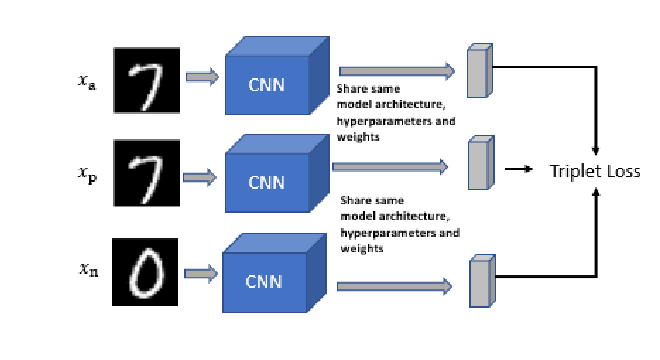

In [96]:
plt.figure(figsize=(25, 6))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/11.png'), cv2.COLOR_BGR2RGB))
plt.show()

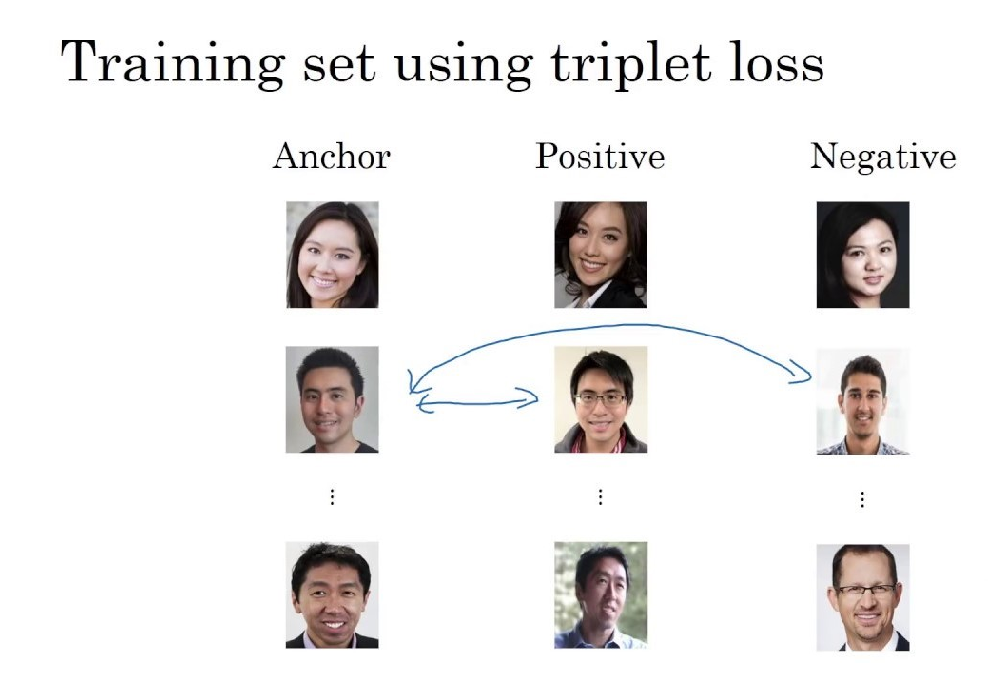

In [84]:
plt.figure(figsize=(40, 12))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/10.jpg'), cv2.COLOR_BGR2RGB))
plt.show()

## Let's implement Triplet Loss

In [34]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when we define a loss in Keras, we don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]    
 
    # Step 1: Computing the (encoding) distance between the anchor and the positive, we will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis = -1)
    
    # Step 2: Computing the (encoding) distance between the anchor and the negative, we will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis = -1)
    
    # Step 3: subtracting the two previous distances and add alpha
    basic_loss = pos_dist- neg_dist + alpha
    
    # Step 4: Taking the maximum of basic_loss and 0.0 and Suming over the training examples
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    
    return loss

In [44]:
tf.random.set_seed(1)
y_true = (None, None, None)
y_pred = (tf.random.normal([3, 128], mean=6, stddev=0.1, seed = 1),
          tf.random.normal([3, 128], mean=1, stddev=1, seed = 1),
          tf.random.normal([3, 128], mean=3, stddev=4, seed = 1))
loss = triplet_loss(y_true, y_pred)
print("loss = " + str(loss.numpy()))

loss = 527.2598


## Building Siamese Network

In [63]:
def build_siamese_model(inputShape, embeddingDim=128):
    # specify the inputs for the feature extractor network
    inputs = Input(inputShape)
    # define the first set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    # second set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    # prepare the final outputs
    pooledOutput = GlobalAveragePooling2D()(x)
    outputs = Dense(embeddingDim)(pooledOutput)
    # build the model while passing Input, Output
    model = Model(inputs, outputs)
    # return the model to the calling function
    return model

In [64]:
siamese_models = build_siamese_model((50000, 28, 28))

In [68]:
siamese_model.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(siamese_model)

Here are some examples of distances between the encodings between three individuals:

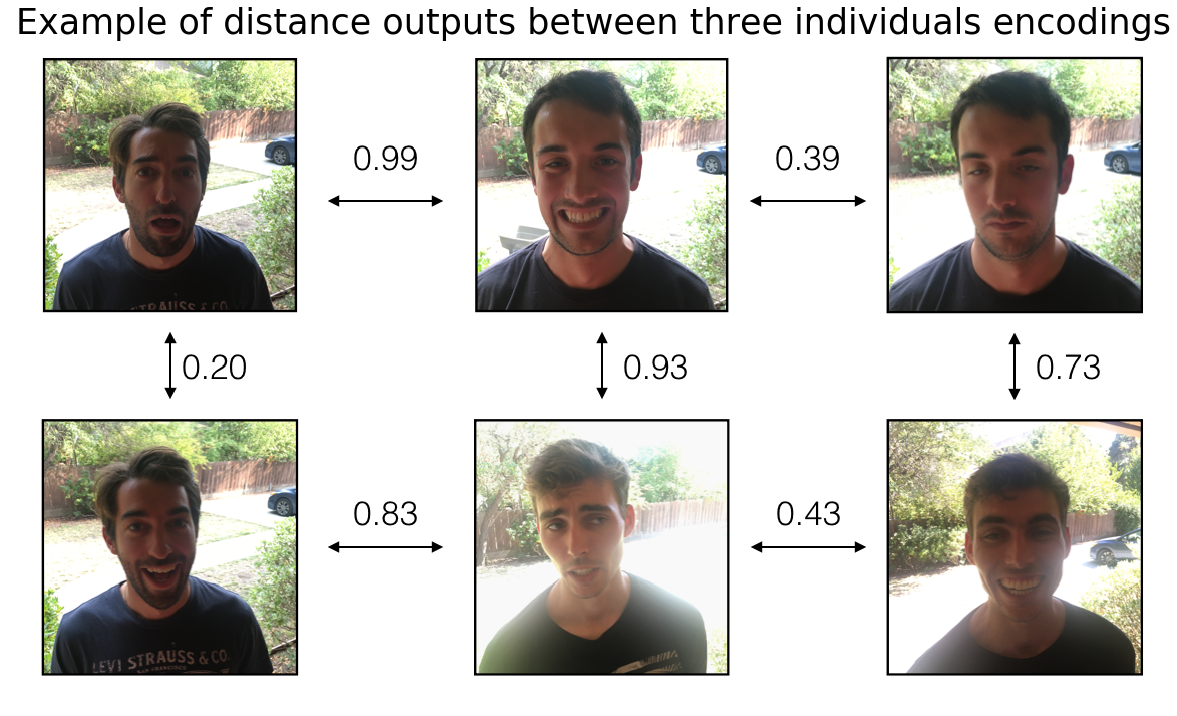

In [75]:
plt.figure(figsize=(50, 12))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/9.png'), cv2.COLOR_BGR2RGB))
plt.title('Example of distance outputs between three individuals encodings', fontsize=35)
plt.show()

Let's now use this model to perform **face verification** and **face recognition**! 

# 3 - Applying the model

We are building a system for an office building where the building manager would like to offer **facial recognition** to allow the employees to enter the building.

We'd like to build a **Face verification** system that gives access to the list of people who live or work there. To get admitted, each person has to swipe an ID card (identification card) to identify themselves at the entrance. The **face recognition** system then checks that they are who they claim to be.

# **3.1 Face Verification**

Let's build a database containing one encoding vector for each person who is allowed to enter the office. To generate the encoding we use `img_to_encoding(image_path, model)`, which runs the forward propagation of the model on the specified image. 

Below is code to build the database (represented as a python dictionary). This database maps each person's name to a 128-dimensional encoding of their face.

In [76]:
database = {}
database["danielle"] = img_to_encoding("images/danielle.png", siamese_model)
database["younes"] = img_to_encoding("images/younes.jpg", siamese_model)
database["tian"] = img_to_encoding("images/tian.jpg", siamese_model)
database["andrew"] = img_to_encoding("images/andrew.jpg", siamese_model)
database["kian"] = img_to_encoding("images/kian.jpg", siamese_model)
database["dan"] = img_to_encoding("images/dan.jpg", siamese_model)
database["sebastiano"] = img_to_encoding("images/sebastiano.jpg", siamese_model)
database["bertrand"] = img_to_encoding("images/bertrand.jpg", siamese_model)
database["kevin"] = img_to_encoding("images/kevin.jpg", siamese_model)
database["felix"] = img_to_encoding("images/felix.jpg", siamese_model)
database["benoit"] = img_to_encoding("images/benoit.jpg", siamese_model)
database["arnaud"] = img_to_encoding("images/arnaud.jpg", siamese_model)

Now, when someone shows up at our front door and swipes their ID card (thus giving us their name), we can look up their encoding in the database, and use it to check if the person standing at the front door matches the name on the ID.

Now let's Implement the verify() function which checks if the front-door camera picture (`image_path`) is actually the person called "identity". 


We have to do the following steps:
1. Computing the encoding of the image from `image_path`.
2. Computing the distance between this encoding and the encoding of the identity image stored in the database.
3. Opening the door if the distance is less than 0.7, else do not open it.

We should use the L2 distance [np.linalg.norm](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html). 

## Let's create Verify function for doing Face Verification

In [77]:
def verify(image_path, identity, database, model):
    """
    Function that verifies if the person on the "image_path" image is "identity".
    
    Arguments:
    image_path -- path to an image
    identity -- string, name of the person we'd like to verify the identity. Has to be an employee who works in the office.
    database -- python dictionary mapping names of allowed people's names (strings) to their encodings (vectors).
    model -- our Inception model instance in Keras
    
    Returns:
    dist -- distance between the image_path and the image of "identity" in the database.
    door_open -- True, if the door should open. False otherwise.
    """
    # Step 1: Computing the encoding for the image
    encoding = img_to_encoding(image_path, model)
    
    # Step 2: Computing distance with identity's image
    dist = np.linalg.norm(encoding - database[identity])
    
    # Step 3: Open the door if dist < 0.7, else don't open
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
        
    return dist, door_open

Younes is trying to enter the office and the camera takes a picture of him ("images/camera_0.jpg"). Let's run our verification algorithm on this picture:

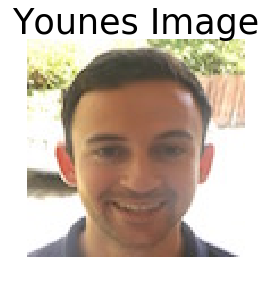

In [79]:
plt.figure(figsize=(7, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/camera_0.jpg'), cv2.COLOR_BGR2RGB))
plt.title('Younes Image', fontsize=35)
plt.show()

In [25]:
verify("images/camera_0.jpg", "younes", database, FRmodel)

It's younes, welcome in!


(0.65939289, True)

Benoit, who does not work in the office, stole Kian's ID card and tried to enter the office. The camera took a picture of Benoit ("images/camera_2.jpg). Let's run the verification algorithm to check if benoit can enter.

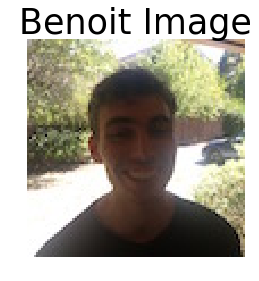

In [80]:
plt.figure(figsize=(7, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.imread('images/camera_2.jpg'), cv2.COLOR_BGR2RGB))
plt.title('Benoit Image', fontsize=35)
plt.show()

In [26]:
verify("images/camera_2.jpg", "kian", database, FRmodel)

It's not kian, please go away


(0.86224014, False)

# **3.2 Facial Recognition**

Our **face verification** system is mostly working well. But since Kian got his ID card stolen, when he came back to the office the next day and couldn't get in! 

To solve this, we'd like to change our **face verification** system to a **face recognition** system. This way, no one has to carry an ID card anymore. An authorized person can just walk up to the building, and the door will unlock for them! 

We'll implement a **face recognition** system that takes as input an image, and figures out if it is one of the authorized persons (and if so, who). Unlike the previous **face verification** system, we will no longer get a person's name as one of the inputs.

We will now implement `who_is_it()`. We will have to go through the following steps:
1. Compute the target encoding of the image from image_path
2. Find the encoding from the database that has smallest distance with the target encoding. 
    - Initializing the `min_dist` variable to a large enough number (100). It will help us keep track of what is the closest encoding to the input's encoding.
    - Looping over the database dictionary's names and encodings. To loop we will use `for (name, db_enc) in database.items()`.
        - Compute the L2 distance between the target "encoding" and the current "encoding" from the database.
        - If this distance is less than the min_dist, then set `min_dist` to `dist`, and `identity` to `name`.

## Let's create a function for doing **Facial Recognition**

In [81]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
    image_path -- path to an image
    database -- database containing image encodings along with the name of the person on the image
    model -- The Siamese Network we created above
    
    Returns:
    min_dist -- the minimum distance between image_path encoding and the encodings from the database
    identity -- string, the name prediction for the person on image_path
    """
    
    ## Step 1: Computing the target "encoding" for the image.
    encoding = img_to_encoding(image_path, model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initializing "min_dist" to a large value, say 100
    min_dist = 100
    
    # Looping over the database dictionary's names and encodings
    for (name, db_enc) in database.items():
        
        # Computing L2 distance between the target "encoding" and the current "emb" from the database
        dist = np.linalg.norm(encoding-db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name
        if dist < min_dist:
            min_dist = dist
            identity = name
            
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

Younes is at the front-door and the camera takes a picture of him ("images/camera_0.jpg"). Let's see if our who_it_is() algorithm identifies Younes. 

In [28]:
who_is_it("images/camera_0.jpg", database, FRmodel)

it's younes, the distance is 0.659393


(0.65939289, 'younes')

* Our face recognition system is working well! It only lets in authorized persons, and people don't need to carry an ID card around anymore! 
* We've now seen how a state-of-the-art face recognition system works.

## Ways to improve our facial recognition model
- Put more images of each person (under different lighting conditions, taken on different days, etc.) into the database. Then given a new image, compare the new face to multiple pictures of the person. This would increase accuracy.
- Crop the images to just contain the face, and less of the "border" region around the face. This preprocessing removes some of the irrelevant pixels around the face, and also makes the algorithm more robust.


# Conclusion

In this notebook, we discussed how **Siamese networks** are different from normal **deep learning networks**. **Siamese network** inspired by the **Siamese twins** is a **one-shot** classification to differentiate between similar and dissimilar images. It can be applied even when we don’t know all of our training time classes and have limited training data. **Siamese network** is based on a **metrics learning** approach that finds the relative distance between its inputs using **triplet loss**. We have discussed architecture of **Siamese Network**, alos discussed **Triplet Loss** which is the loss function used by the network while training. We have implemented a **Face Verification** and **Facial Recognition** system for an **Office Building** using **Siamese networks**. We have also discussed about **pros & cons** of **Siamese Network** and the ways to improve **facial recognition system**.

- **Face verification** solves an easier **1:1** matching problem; **Face recognition** addresses a harder **1:K** matching problem. 
- The **triplet loss** is an effective loss function for training a neural network to learn an **encoding** of a face image.
- The same encoding can be used for **verification** and **recognition**. Measuring distances between two images' encodings allows us to determine whether they are pictures of the same person. 

# Thank You !!!